<a href="https://colab.research.google.com/github/MarialRK/Starter-Notebook/blob/main/Starter_Notebook_Daniel_Kudum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Using Gradient Descent: Linear Regression

In this assignment, you will build a simple linear regression model to predict sales based on TV marketing expenses. You will investigate three different approaches to this problem. You will use `NumPy` and `Scikit-Learn` linear regression models, as well as construct and optimize the sum of squares cost function with gradient descent from scratch.

Further you will add additional cells to compare Linear regression and atleast 1 other algorithm

# Table of Contents

- [ 1 - Open the Dataset and State the Problem]
  - [ Exercise 1]
- [ 2 - Linear Regression in Python with `NumPy` and `Scikit-Learn`]
  - [ 2.1 - Linear Regression with `NumPy`]
    - [ Exercise 2]
  - [ 2.2 - Linear Regression with `Scikit-Learn`]
    - [ Exercise 3]
    - [ Exercise 4]
- [ 3 - Linear Regression using Gradient Descent]
  - [ Exercise 5]
  - [ Exercise 6]

## Packages

Load the required packages:

In [6]:
# Import required libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
from sklearn.linear_model import LinearRegression  # For linear regression
from sklearn.tree import DecisionTreeRegressor  # For decision tree regression
from sklearn.ensemble import RandomForestRegressor  # For random forest regression
from sklearn.metrics import mean_squared_error  # For calculating RMSE
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets

Import the unit tests defined for this notebook.

In [7]:
# Import the unit tests
import w2_unittest

In [8]:
# Check if the unit test module is loaded
print("Unit test module loaded:", "w2_unittest" in globals())

Unit test module loaded: True


<a name='1'></a>
## 1 - Open the Dataset and State the Problem

In this lab, you will build a linear regression model for a simple Kaggle dataset, saved in a file `data/tvmarketing.csv`. The dataset has only two fields: TV marketing expenses (`TV`) and sales amount (`Sales`).

<a name='ex01'></a>
### Exercise 1

Use `pandas` function `pd.read_csv` to open the .csv file the from the `path`.

In [9]:
path = "/content/tvmarketing.csv"  # Colab stores uploaded files in /content

In [10]:
path = "/content/tvmarketing.csv"  # Colab stores uploaded files in /content

In [11]:
import pandas as pd

# Define the path to the dataset
path = "/content/tvmarketing.csv"  # Update this based on the file location

# Load the dataset
adv = pd.read_csv(path)

# Print the first few rows
print(adv.head())

      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


##### __Expected Output__

```Python
	TV	Sales
0	230.1	22.1
1	44.5	10.4
2	17.2	9.3
3	151.5	18.5
4	180.8	12.9
```

In [12]:
# Run the unit test
w2_unittest.test_load_data(adv)

 All tests passed


`pandas` has a function to make plots from the DataFrame fields. By default, matplotlib is used at the backend. Let's use it here:

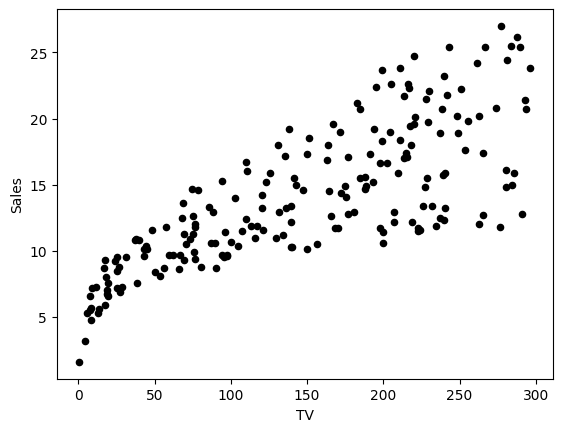

In [71]:
import matplotlib.pyplot as plt

# Scatter plot of TV vs Sales
adv.plot(x='TV', y='Sales', kind='scatter', c='black')
plt.show()

You can use this dataset to solve a simple problem with linear regression: given a TV marketing budget, predict sales.

<a name='2'></a>
## 2 - Linear Regression in Python with `NumPy` and `Scikit-Learn`

Save the required field of the DataFrame into variables `X` and `Y`:

In [14]:
# Extract the TV column as the feature (X)
X = adv['TV'].values

# Extract the Sales column as the target (Y)
Y = adv['Sales'].values

In [15]:
# Print the first 5 values of X and Y
print("TV (X):", X[:5])
print("Sales (Y):", Y[:5])

TV (X): [230.1  44.5  17.2 151.5 180.8]
Sales (Y): [22.1 10.4  9.3 18.5 12.9]


<a name='2.1'></a>
### 2.1 - Linear Regression with `NumPy`

You can use the function `np.polyfit(x, y, deg)` to fit a polynomial of degree `deg` to points $(x, y)$, minimising the sum of squared errors. You can read more in the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). Taking `deg = 1` you can obtain the slope `m` and the intercept `b` of the linear regression line:

In [16]:
import numpy as np

# Fit a linear regression model using np.polyfit
m_numpy, b_numpy = np.polyfit(X, Y, deg=1)

# Print the slope and intercept
print(f"Linear regression with NumPy. Slope: {m_numpy}. Intercept: {b_numpy}")

Linear regression with NumPy. Slope: 0.04753664043301975. Intercept: 7.0325935491276965


*Note*: [`NumPy` documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) suggests the [`Polynomial.fit` class method](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.fit.html#numpy.polynomial.polynomial.Polynomial.fit) as recommended for new code as it is more stable numerically. But in this simple example, you can stick to the `np.polyfit` function for simplicity.

<a name='ex02'></a>
### Exercise 2

Make predictions substituting the obtained slope and intercept coefficients into the equation $Y = mX + b$, given an array of $X$ values.

In [17]:
def pred_numpy(m, b, X):
    Y = m * X + b  # Linear regression equation: Y = mX + b
    return Y

# Test the function
X_pred = np.array([50, 120, 280])
Y_pred_numpy = pred_numpy(m_numpy, b_numpy, X_pred)

# Print the predictions
print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using NumPy linear regression:\n{Y_pred_numpy}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using NumPy linear regression:
[ 9.40942557 12.7369904  20.34285287]


In [72]:
X_pred = np.array([50, 120, 280])
Y_pred_numpy = pred_numpy(m_numpy, b_numpy, X_pred)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using NumPy linear regression:\n{Y_pred_numpy}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using NumPy linear regression:
[ 9.40942557 12.7369904  20.34285287]


##### __Expected Output__

```Python
TV marketing expenses:
[ 50 120 280]
Predictions of sales using NumPy linear regression:
[ 9.40942557 12.7369904  20.34285287]
```

In [19]:
# Run the unit test
w2_unittest.test_pred_numpy(pred_numpy)

 All tests passed


<a name='2.2'></a>
### 2.2 - Linear Regression with `Scikit-Learn`

`Scikit-Learn` is an open-source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities. `Scikit-learn` provides dozens of built-in machine learning algorithms and models, called **estimators**. Each estimator can be fitted to some data using its `fit` method. Full documentation can be found [here](https://scikit-learn.org/stable/).

Create an estimator object for a linear regression model:

In [20]:
# Reshape X and Y for Scikit-Learn
X_sklearn = X.reshape(-1, 1)
Y_sklearn = Y.reshape(-1, 1)

# Print the shapes
print(f"Shape of new X array: {X_sklearn.shape}")
print(f"Shape of new Y array: {Y_sklearn.shape}")

Shape of new X array: (200, 1)
Shape of new Y array: (200, 1)


The estimator can learn from data calling the `fit` function. However, trying to run the following code you will get an error, as the data needs to be reshaped into 2D array:

In [21]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X_sklearn, Y_sklearn, test_size=0.2, random_state=42)

You can increase the dimension of the array by one with `reshape` function, or there is another another way to do it:

In [22]:
X_sklearn = X[:, np.newaxis]
Y_sklearn = Y[:, np.newaxis]

print(f"Shape of new X array: {X_sklearn.shape}")
print(f"Shape of new Y array: {Y_sklearn.shape}")

Shape of new X array: (200, 1)
Shape of new Y array: (200, 1)


You have already loaded your dataset into X_sklearn and Y_sklearn
Step 1: Split the data into training and testing sets use train_test_split from sklearn
The test size shoukd be 20% of the data

In [23]:
from sklearn.model_selection import train_test_split

Step 2: Fit the linear regression model to the training data


In [24]:
 from sklearn.linear_model import LinearRegression

# Create a linear regression model
lr_sklearn = LinearRegression()

# Fit the model to the training data
lr_sklearn.fit(X_train, Y_train)

# Get the slope and intercept
m_sklearn = lr_sklearn.coef_[0][0]
b_sklearn = lr_sklearn.intercept_[0]

print(f"Linear regression using Scikit-Learn. Slope: {m_sklearn}. Intercept: {b_sklearn}")

Linear regression using Scikit-Learn. Slope: 0.046529733705443346. Intercept: 7.119638430592953


In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_sklearn, Y_sklearn, test_size=0.2, random_state=42)

In [25]:
# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (160, 1)
Shape of X_test: (40, 1)
Shape of Y_train: (160, 1)
Shape of Y_test: (40, 1)


In [26]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_sklearn, Y_sklearn, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (160, 1)
Shape of X_test: (40, 1)
Shape of Y_train: (160, 1)
Shape of Y_test: (40, 1)


In [27]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
lr_sklearn = LinearRegression()

# Fit the model to the training data
lr_sklearn.fit(X_train, Y_train)

LinearRegression()


 Step 3: Make predictions using the fitted model on the testing data


In [28]:
# Make predictions on the test data
Y_pred = lr_sklearn.predict(X_test)

In [29]:
# Print the predictions
print("Predictions (Y_pred):", Y_pred)

Predictions (Y_pred): [[14.71794394]
 [16.2115484 ]
 [20.74819743]
 [ 7.66403631]
 [17.37013877]
 [10.61402143]
 [17.2072847 ]
 [ 9.44612512]
 [17.46785121]
 [15.2669948 ]
 [ 8.58532504]
 [ 9.73460946]
 [18.03086098]
 [ 7.37089899]
 [13.61053628]
 [15.03899911]
 [ 7.45930549]
 [16.31391381]
 [10.62332738]
 [18.16579721]
 [17.79821232]
 [10.27435438]
 [ 8.88776831]
 [18.79394862]
 [10.33019006]
 [ 9.60897918]
 [17.05373658]
 [13.60123034]
 [11.17703121]
 [ 7.51048819]
 [16.41627922]
 [10.339496  ]
 [16.37440246]
 [ 7.90599093]
 [20.18053468]
 [18.203021  ]
 [ 9.36702457]
 [19.85482655]
 [12.57292322]
 [ 8.39920611]]


In [30]:
# Make predictions on the test data
Y_pred = lr_sklearn.predict(X_test)

# Print the predictions
print("Predictions (Y_pred):", Y_pred)

Predictions (Y_pred): [[14.71794394]
 [16.2115484 ]
 [20.74819743]
 [ 7.66403631]
 [17.37013877]
 [10.61402143]
 [17.2072847 ]
 [ 9.44612512]
 [17.46785121]
 [15.2669948 ]
 [ 8.58532504]
 [ 9.73460946]
 [18.03086098]
 [ 7.37089899]
 [13.61053628]
 [15.03899911]
 [ 7.45930549]
 [16.31391381]
 [10.62332738]
 [18.16579721]
 [17.79821232]
 [10.27435438]
 [ 8.88776831]
 [18.79394862]
 [10.33019006]
 [ 9.60897918]
 [17.05373658]
 [13.60123034]
 [11.17703121]
 [ 7.51048819]
 [16.41627922]
 [10.339496  ]
 [16.37440246]
 [ 7.90599093]
 [20.18053468]
 [18.203021  ]
 [ 9.36702457]
 [19.85482655]
 [12.57292322]
 [ 8.39920611]]


 Step 4: Calculate the RMSE
Using sklearn.metrics - mean_squared_error

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the RMSE
print("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 3.194472431998898


In [33]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the RMSE
print("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 3.194472431998898


In [34]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the RMSE
print("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 3.194472431998898


In [35]:
# To do
#Print out the rank of models From the best to the worst performing and associated RSMEs

#Replace the code below with appropriatly

model_rank = {
'linear regression' : '0.1',
'Random Forest' : '0.1',
'Decision Trees' : '0.1'


}
print (model_rank)


{'linear regression': '0.1', 'Random Forest': '0.1', 'Decision Trees': '0.1'}


The estimator can learn from data calling the `fit` function for RandomForest and Decision Trees

Compare the RSME for the three different models and rank them according to performance i.e Print out Model Rank and Associated RSME

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Linear Regression
lr_sklearn = LinearRegression()
lr_sklearn.fit(X_train, Y_train)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


DecisionTreeRegressor(random_state=42)

In [37]:
# Predictions for Linear Regression
Y_pred_lr = lr_sklearn.predict(X_test)

# Predictions for Random Forest
Y_pred_rf = rf_model.predict(X_test)

# Predictions for Decision Tree
Y_pred_dt = dt_model.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error
import numpy as np

# RMSE for Linear Regression
rmse_lr = np.sqrt(mean_squared_error(Y_test, Y_pred_lr))

# RMSE for Random Forest
rmse_rf = np.sqrt(mean_squared_error(Y_test, Y_pred_rf))

# RMSE for Decision Tree
rmse_dt = np.sqrt(mean_squared_error(Y_test, Y_pred_dt))

<a name='ex03'></a>
### Exercise 3

Fit the linear regression model passing `X_sklearn` and `Y_sklearn` arrays into the function `lr_sklearn.fit`.

In [43]:
# Fit the linear regression model to the training data
lr_sklearn.fit(X_sklearn, Y_sklearn)

LinearRegression()

In [41]:
m_sklearn = lr_sklearn.coef_
b_sklearn = lr_sklearn.intercept_

print(f"Linear regression using Scikit-Learn. Slope: {m_sklearn}. Intercept: {b_sklearn}")

Linear regression using Scikit-Learn. Slope: [[0.04652973]]. Intercept: [7.11963843]


##### __Expected Output__

```Python
Linear regression using Scikit-Learn. Slope: [[0.04753664]]. Intercept: [7.03259355]
```

In [44]:
w2_unittest.test_sklearn_fit(lr_sklearn)

 All tests passed


Note that you have got the same result as with the `NumPy` function `polyfit`. Now, to make predictions it is convenient to use `Scikit-Learn` function `predict`.

<a name='ex04'></a>
### Exercise 4


Increase the dimension of the $X$ array using the function `np.newaxis` (see an example above) and pass the result to the `lr_sklearn.predict` function to make predictions.

In [46]:
def pred_sklearn(X, lr_sklearn):
    ### START CODE HERE ### (~ 2 lines of code)
    X_2D = X[:, np.newaxis]  # Increase the dimension of X using np.newaxis
    Y = lr_sklearn.predict(X_2D)  # Make predictions using the fitted model
    ### END CODE HERE ###

    return Y

In [47]:
Y_pred_sklearn = pred_sklearn(X_pred, lr_sklearn)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using Scikit_Learn linear regression:\n{Y_pred_sklearn.T}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using Scikit_Learn linear regression:
[[ 9.40942557 12.7369904  20.34285287]]


##### __Expected Output__

```Python
TV marketing expenses:
[ 50 120 280]
Predictions of sales using Scikit_Learn linear regression:
[[ 9.40942557 12.7369904  20.34285287]]
```

In [48]:
w2_unittest.test_sklearn_predict(pred_sklearn, lr_sklearn)

 All tests passed


You can plot the linear regression line and the predictions by running the following code. The regression line is red and the predicted points are blue.

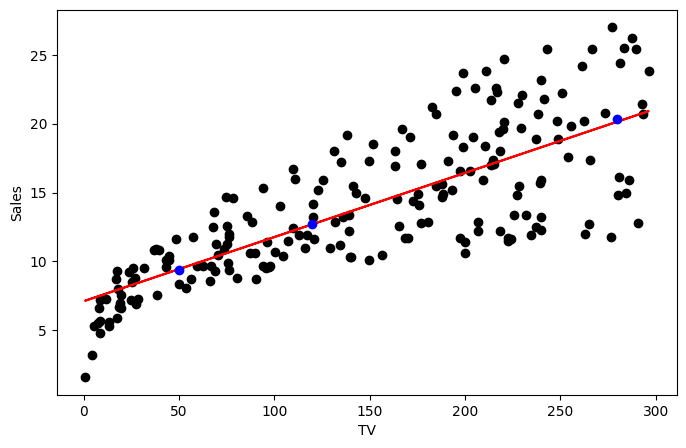

In [49]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(X, Y, 'o', color='black')
ax.set_xlabel('TV')
ax.set_ylabel('Sales')

ax.plot(X, m_sklearn[0][0]*X+b_sklearn[0], color='red')
ax.plot(X_pred, Y_pred_sklearn, 'o', color='blue')

<a name='3'></a>
## 3 - Linear Regression using Gradient Descent

Functions to fit the models automatically are convenient to use, but for an in-depth understanding of the model and the maths behind it is good to implement an algorithm by yourself. Let's try to find linear regression coefficients $m$ and $b$, by minimising the difference between original values $y^{(i)}$ and predicted values $\hat{y}^{(i)}$ with the **loss function** $L\left(w, b\right)  = \frac{1}{2}\left(\hat{y}^{(i)} - y^{(i)}\right)^2$ for each of the training examples. Division by $2$ is taken just for scaling purposes, you will see the reason below, calculating partial derivatives.

To compare the resulting vector of the predictions $\hat{Y}$ with the vector $Y$ of original values $y^{(i)}$, you can take an average of the loss function values for each of the training examples:

$$E\left(m, b\right) = \frac{1}{2n}\sum_{i=1}^{n} \left(\hat{y}^{(i)} - y^{(i)}\right)^2 =
\frac{1}{2n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right)^2,\tag{1}$$

where $n$ is a number of data points. This function is called the sum of squares **cost function**. To use gradient descent algorithm, calculate partial derivatives as:

\begin{align}
\frac{\partial E }{ \partial m } &=
\frac{1}{n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right)x^{(i)},\\
\frac{\partial E }{ \partial b } &=
\frac{1}{n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right),
\tag{2}\end{align}

and update the parameters iteratively using the expressions

\begin{align}
m &= m - \alpha \frac{\partial E }{ \partial m },\\
b &= b - \alpha \frac{\partial E }{ \partial b },
\tag{3}\end{align}

where $\alpha$ is the learning rate.

Original arrays `X` and `Y` have different units. To make gradient descent algorithm efficient, you need to bring them to the same units. A common approach to it is called **normalization**: substract the mean value of the array from each of the elements in the array and divide them by standard deviation (a statistical measure of the amount of dispersion of a set of values). If you are not familiar with mean and standard deviation, do not worry about this for now - this is covered in the next Course of Specialization.

Normalization is not compulsory - gradient descent would work without it. But due to different units of `X` and `Y`, the cost function will be much steeper. Then you would need to take a significantly smaller learning rate $\alpha$, and the algorithm will require thousands of iterations to converge instead of a few dozens. Normalization helps to increase the efficiency of the gradient descent algorithm.

Normalization is implemented in the following code:

In [50]:
X_norm = (X - np.mean(X))/np.std(X)
Y_norm = (Y - np.mean(Y))/np.std(Y)

Define cost function according to the equation $(1)$:

In [51]:
def E(m, b, X, Y):
    return #TO DO

In [56]:
def E(m, b, X, Y):
    """
    Compute the cost function for linear regression.

    Parameters:
    m (float): Slope of the regression line.
    b (float): Intercept of the regression line.
    X (numpy array): Input features.
    Y (numpy array): Target values.

    Returns:
    float: The value of the cost function.
    """
    n = len(X)  # Number of data points
    predictions = m * X + b  # Predicted values
    error = predictions - Y  # Error between predictions and actual values
    cost = (1 / (2 * n)) * np.sum(error ** 2)  # Cost function
    return cost

In [57]:
def dEdm(m, b, X, Y):
    """
    Compute the partial derivative of the cost function with respect to m.

    Parameters:
    m (float): Slope of the regression line.
    b (float): Intercept of the regression line.
    X (numpy array): Input features.
    Y (numpy array): Target values.

    Returns:
    float: The partial derivative with respect to m.
    """
    n = len(X)  # Number of data points
    predictions = m * X + b  # Predicted values
    error = predictions - Y  # Error between predictions and actual values
    derivative = (1 / n) * np.sum(error * X)  # Partial derivative with respect to m
    return derivative


def dEdb(m, b, X, Y):
    """
    Compute the partial derivative of the cost function with respect to b.

    Parameters:
    m (float): Slope of the regression line.
    b (float): Intercept of the regression line.
    X (numpy array): Input features.
    Y (numpy array): Target values.

    Returns:
    float: The partial derivative with respect to b.
    """
    n = len(X)  # Number of data points
    predictions = m * X + b  # Predicted values
    error = predictions - Y  # Error between predictions and actual values
    derivative = (1 / n) * np.sum(error)  # Partial derivative with respect to b
    return derivative

In [58]:
def gradient_descent(dEdm, dEdb, m, b, X, Y, learning_rate=0.001, num_iterations=1000, print_cost=False):
    """
    Perform gradient descent to optimize the parameters m and b.

    Parameters:
    dEdm (function): Function to compute the partial derivative with respect to m.
    dEdb (function): Function to compute the partial derivative with respect to b.
    m (float): Initial slope of the regression line.
    b (float): Initial intercept of the regression line.
    X (numpy array): Input features.
    Y (numpy array): Target values.
    learning_rate (float): Learning rate for gradient descent.
    num_iterations (int): Number of iterations for gradient descent.
    print_cost (bool): Whether to print the cost after each iteration.

    Returns:
    tuple: Optimized values of m and b.
    """
    for iteration in range(num_iterations):
        # Compute gradients
        dm = dEdm(m, b, X, Y)
        db = dEdb(m, b, X, Y)

        # Update parameters
        m = m - learning_rate * dm
        b = b - learning_rate * db

        # Print cost (optional)
        if print_cost and iteration % 100 == 0:
            print(f"Cost after iteration {iteration}: {E(m, b, X, Y)}")

    return m, b

In [59]:
# Normalize X and Y
X_norm = (X - np.mean(X)) / np.std(X)
Y_norm = (Y - np.mean(Y)) / np.std(Y)

In [60]:
# Initialize parameters
m_initial = 0
b_initial = 0

# Set hyperparameters
learning_rate = 0.1
num_iterations = 1000

# Run gradient descent
m_gd, b_gd = gradient_descent(dEdm, dEdb, m_initial, b_initial, X_norm, Y_norm, learning_rate, num_iterations, print_cost=True)

print(f"Optimized parameters: m = {m_gd}, b = {b_gd}")

Cost after iteration 0: 0.4418718701692433
Cost after iteration 100: 0.19406247474979593
Cost after iteration 200: 0.19406247457496448
Cost after iteration 300: 0.19406247457496448
Cost after iteration 400: 0.19406247457496448
Cost after iteration 500: 0.19406247457496448
Cost after iteration 600: 0.19406247457496448
Cost after iteration 700: 0.19406247457496448
Cost after iteration 800: 0.19406247457496448
Cost after iteration 900: 0.19406247457496448
Optimized parameters: m = 0.7822244248616059, b = -2.784439345759894e-16


<a name='ex05'></a>
### Exercise 5


Define functions `dEdm` and `dEdb` to calculate partial derivatives according to the equations $(2)$. This can be done using vector form of the input data `X` and `Y`.

In [61]:
def dEdm(m, b, X, Y):
    """
    Compute the partial derivative of the cost function with respect to m.

    Parameters:
    m (float): Slope of the regression line.
    b (float): Intercept of the regression line.
    X (numpy array): Input features.
    Y (numpy array): Target values.

    Returns:
    float: The partial derivative with respect to m.
    """
    n = len(X)  # Number of data points
    predictions = m * X + b  # Predicted values
    error = predictions - Y  # Error between predictions and actual values
    derivative = (1 / n) * np.sum(error * X)  # Partial derivative with respect to m
    return derivative


def dEdb(m, b, X, Y):
    """
    Compute the partial derivative of the cost function with respect to b.

    Parameters:
    m (float): Slope of the regression line.
    b (float): Intercept of the regression line.
    X (numpy array): Input features.
    Y (numpy array): Target values.

    Returns:
    float: The partial derivative with respect to b.
    """
    n = len(X)  # Number of data points
    predictions = m * X + b  # Predicted values
    error = predictions - Y  # Error between predictions and actual values
    derivative = (1 / n) * np.sum(error)  # Partial derivative with respect to b
    return derivative


In [62]:
# Test the functions
print(dEdm(0, 0, X_norm, Y_norm))  # Expected: -0.7822244248616067
print(dEdb(0, 0, X_norm, Y_norm))  # Expected: 5.098005351200641e-16
print(dEdm(1, 5, X_norm, Y_norm))  # Expected: 0.21777557513839355
print(dEdb(1, 5, X_norm, Y_norm))  # Expected: 5.000000000000002

-0.7822244248616065
1.687538997430238e-16
0.21777557513839405
5.000000000000001


##### __Expected Output__

```Python
-0.7822244248616067
5.098005351200641e-16
0.21777557513839355
5.000000000000002
```

In [63]:
w2_unittest.test_partial_derivatives(dEdm, dEdb, X_norm, Y_norm)

 All tests passed


<a name='ex06'></a>
### Exercise 6


Implement gradient descent using expressions $(3)$:
\begin{align}
m &= m - \alpha \frac{\partial E }{ \partial m },\\
b &= b - \alpha \frac{\partial E }{ \partial b },
\end{align}

where $\alpha$ is the `learning_rate`.

In [64]:
def gradient_descent(dEdm, dEdb, m, b, X, Y, learning_rate=0.001, num_iterations=1000, print_cost=False):
    """
    Perform gradient descent to optimize the parameters m and b.

    Parameters:
    dEdm (function): Function to compute the partial derivative with respect to m.
    dEdb (function): Function to compute the partial derivative with respect to b.
    m (float): Initial slope of the regression line.
    b (float): Initial intercept of the regression line.
    X (numpy array): Input features.
    Y (numpy array): Target values.
    learning_rate (float): Learning rate for gradient descent.
    num_iterations (int): Number of iterations for gradient descent.
    print_cost (bool): Whether to print the cost after each iteration.

    Returns:
    tuple: Optimized values of m and b.
    """
    for iteration in range(num_iterations):
        # Compute gradients
        dm = dEdm(m, b, X, Y)
        db = dEdb(m, b, X, Y)

        # Update parameters
        m = m - learning_rate * dm
        b = b - learning_rate * db

        # Print cost (optional)
        if print_cost and iteration % 100 == 0:
            print(f"Cost after iteration {iteration}: {E(m, b, X, Y)}")

    return m, b

In [65]:
# Test gradient descent
print(gradient_descent(dEdm, dEdb, 0, 0, X_norm, Y_norm))  # Expected: (0.49460408269589495, -3.489285249624889e-16)
print(gradient_descent(dEdm, dEdb, 1, 5, X_norm, Y_norm, learning_rate=0.01, num_iterations=10))  # Expected: (0.9791767513915026, 4.521910375044022)

(0.4946040826958948, -1.3668621789975043e-16)
(0.9791767513915026, 4.521910375044022)


In [66]:
# Initialize parameters
m_initial = 0
b_initial = 0

# Set hyperparameters
learning_rate = 1.2
num_iterations = 30

# Run gradient descent
m_gd, b_gd = gradient_descent(dEdm, dEdb, m_initial, b_initial, X_norm, Y_norm, learning_rate, num_iterations, print_cost=True)

print(f"Gradient descent result: m_min = {m_gd}, b_min = {b_gd}")

Cost after iteration 0: 0.2062999755919659
Gradient descent result: m_min = 0.7822244248616065, b_min = -2.77111666946439e-16


In [67]:
# Example input array
X_pred = np.array([50, 120, 280])

# Normalize X_pred
X_pred_norm = (X_pred - np.mean(X)) / np.std(X)

# Make predictions using gradient descent coefficients
Y_pred_gd_norm = m_gd * X_pred_norm + b_gd

# Denormalize predictions
Y_pred_gd = Y_pred_gd_norm * np.std(Y) + np.mean(Y)

# Print predictions
print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using Gradient Descent:\n{Y_pred_gd}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using Gradient Descent:
[ 9.40942557 12.7369904  20.34285287]


##### __Expected Output__

```Python
(0.49460408269589495, -3.489285249624889e-16)
(0.9791767513915026, 4.521910375044022)
```

In [68]:
w2_unittest.test_gradient_descent(gradient_descent, dEdm, dEdb, X_norm, Y_norm)

 All tests passed


Now run the gradient descent method starting from the initial point $\left(m_0, b_0\right)=\left(0, 0\right)$.

In [69]:
m_initial = 0; b_initial = 0; num_iterations = 30; learning_rate = 1.2
m_gd, b_gd = gradient_descent(dEdm, dEdb, m_initial, b_initial,
                              X_norm, Y_norm, learning_rate, num_iterations, print_cost=True)

print(f"Gradient descent result: m_min, b_min = {m_gd}, {b_gd}")

Cost after iteration 0: 0.2062999755919659
Gradient descent result: m_min, b_min = 0.7822244248616065, -2.77111666946439e-16


Remember, that the initial datasets were normalized. To make the predictions, you need to normalize `X_pred` array, calculate `Y_pred` with the linear regression coefficients `m_gd`, `b_gd` and then **denormalize** the result (perform the reverse process of normalization):

In [70]:
X_pred = np.array([50, 120, 280])
# Use the same mean and standard deviation of the original training array X
X_pred_norm = (X_pred - np.mean(X))/np.std(X)
Y_pred_gd_norm = m_gd * X_pred_norm + b_gd
# Use the same mean and standard deviation of the original training array Y
Y_pred_gd = Y_pred_gd_norm * np.std(Y) + np.mean(Y)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using Scikit_Learn linear regression:\n{Y_pred_sklearn.T}")
print(f"Predictions of sales using Gradient Descent:\n{Y_pred_gd}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using Scikit_Learn linear regression:
[[ 9.40942557 12.7369904  20.34285287]]
Predictions of sales using Gradient Descent:
[ 9.40942557 12.7369904  20.34285287]


You should have gotten similar results as in the previous sections.

Well done! Now you know how gradient descent algorithm can be applied to train a real model. Re-producing results manually for a simple case should give you extra confidence that you understand what happends under the hood of commonly used functions.